In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re



 ## Pik Raw files processing & cleaning & saving

In [7]:
# Source  : https://www.climatewatchdata.org/data-explorer/historical-emissions?historical-emissions-data-sources=pik&historical-emissions-gases=&historical-emissions-regions=&historical-emissions-sectors=&page=1

df_cw_historical_emissions_pik = pd.read_csv('cw/cw_historical_emissions_pik.csv')

#melt years

# Melt DataFrame to convert year columns into a single column
filtered_columns = [col for col in df_cw_historical_emissions_pik.columns if not bool(re.match(r'^\d{4}$', col))]
df_cw_historical_emissions_pik = df_cw_historical_emissions_pik.melt(id_vars=filtered_columns,
                                            var_name='year', value_name='value_mteqco2')
# Extract the year from the column name
df_cw_historical_emissions_pik['year'] = df_cw_historical_emissions_pik['year'].astype(int)

display(df_cw_historical_emissions_pik)

,country,sector,gas,Source,year,value_mteqco2
0,ABW,Agriculture,CH4,PIK,1850,0.000050
1,ABW,Agriculture,KYOTOGHG,PIK,1850,0.000054
2,ABW,Agriculture,N2O,PIK,1850,0.000005
3,ABW,Energy,CH4,PIK,1850,0.000199
4,ABW,Energy,CO2,PIK,1850,0.000000
...,...,...,...,...,...,...
818027,ZWE,Total excluding LULUCF,KYOTOGHG,PIK,2021,22.100000
818028,ZWE,Total excluding LULUCF,N2O,PIK,2021,4.112400
818029,ZWE,Waste,CH4,PIK,2021,0.875000
818030,ZWE,Waste,KYOTOGHG,PIK,2021,1.040000


In [21]:
#Mapping with region
df_reg = pd.read_csv('../../data/_info/__INFO_UN_M49_fr.csv')
#left joining
df_cw_historical_emissions_pik_reg = df_cw_historical_emissions_pik.merge(df_reg, left_on='country', right_on='ISO-alpha3 Code', how='left')

#filtering gas =/= KYOTOGHG (KYOTOGHG = sum off all gases)
df_cw_historical_emissions_pik_reg = df_cw_historical_emissions_pik_reg.loc[df_cw_historical_emissions_pik_reg['gas'] != 'KYOTOGHG']

#filtering sector =/= Total excluding LULUCF (Total excluding LULUCF = sum of all sectors)
df_cw_historical_emissions_pik_reg = df_cw_historical_emissions_pik_reg.loc[df_cw_historical_emissions_pik_reg['sector'] != 'Total excluding LULUCF']

#renaming
df_cw_historical_emissions_pik_reg.rename(columns={
    'country': 'country_code_a3',
    'Source': 'source',
    'Country or Area': 'country_name',
    'Region Name': 'region_name'
}, inplace=True)

#Selecting columns
selected_columns = ['country_code_a3', 'country_name', 'region_name', 'sector', 'gas', 'year', 'value_mteqco2','source']
df_processed_CW_PIK = df_cw_historical_emissions_pik_reg[selected_columns].copy()

display(df_processed_CW_PIK)

#Saving 
df_processed_CW_PIK.to_csv('../../data/_processed/CW_PIK_historical_emissions_processed.csv', index=False)


,country_code_a3,country_name,region_name,sector,gas,year,value_mteqco2,source
0,ABW,Aruba,Amériques,Agriculture,CH4,1850,0.000050,PIK
2,ABW,Aruba,Amériques,Agriculture,N2O,1850,0.000005,PIK
3,ABW,Aruba,Amériques,Energy,CH4,1850,0.000199,PIK
4,ABW,Aruba,Amériques,Energy,CO2,1850,0.000000,PIK
6,ABW,Aruba,Amériques,Energy,N2O,1850,0.000004,PIK
...,...,...,...,...,...,...,...,...
818020,ZWE,Zimbabwe,Afrique,Industrial Processes and Product Use,CO2,2021,0.905000,PIK
818022,ZWE,Zimbabwe,Afrique,Industrial Processes and Product Use,N2O,2021,0.105492,PIK
818024,ZWE,Zimbabwe,Afrique,Other,N2O,2021,0.292338,PIK
818029,ZWE,Zimbabwe,Afrique,Waste,CH4,2021,0.875000,PIK


## Graphiques

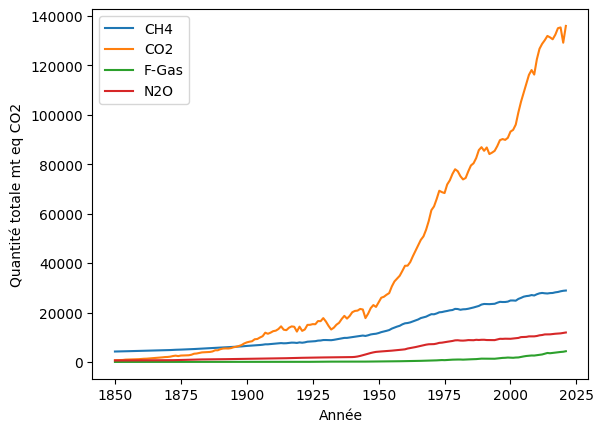

In [22]:
# Quantité par gaz

# Grouper par année et substance et calculer la somme de value_eqco2
df_grouped = df_processed_CW_PIK.groupby(['year', 'gas'])['value_mteqco2'].sum().reset_index()

# Pivoter les données pour avoir les substances comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='gas', values='value_mteqco2')

# Tracer le graphique
df_pivot.plot(kind='line')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale mt eq CO2')


# Afficher le graphique
plt.legend()
plt.show()

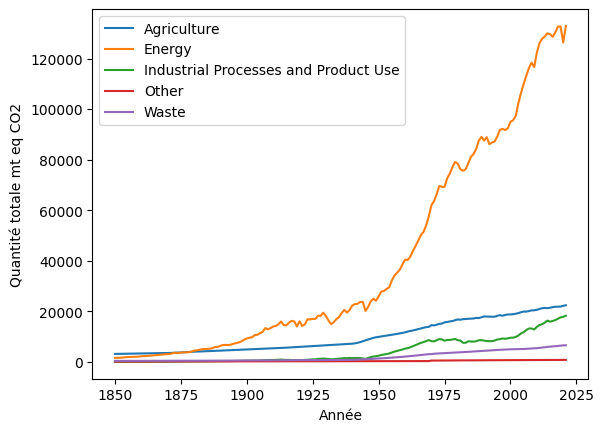

In [23]:
# Quantité par secteur

# Grouper par année et secteur et calculer la somme de value_eqco2
df_grouped = df_processed_CW_PIK.groupby(['year', 'sector'])['value_mteqco2'].sum().reset_index()

# Pivoter les données pour avoir les secteurs comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='sector', values='value_mteqco2')

# Tracer le graphique
df_pivot.plot(kind='line')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale mt eq CO2')


# Afficher le graphique
plt.legend()
plt.show()

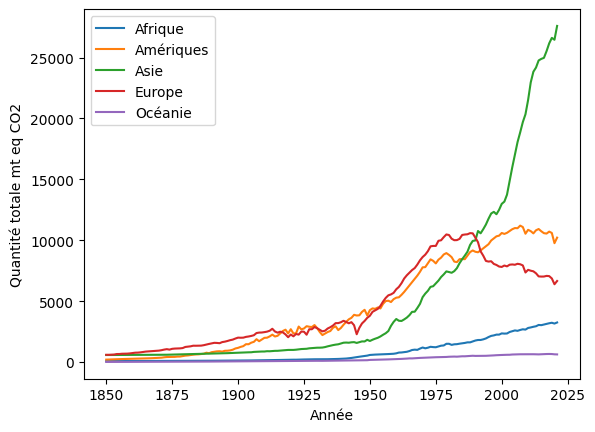

In [24]:
# Quantité par region

# Grouper par année et region et calculer la somme de value_eqco2
df_grouped = df_processed_CW_PIK.groupby(['year', 'region_name'])['value_mteqco2'].sum().reset_index()

# Pivoter les données pour avoir les regions comme colonnes
df_pivot = df_grouped.pivot(index='year', columns='region_name', values='value_mteqco2')

# Tracer le graphique
df_pivot.plot(kind='line')

# Ajouter des étiquettes et un titre au graphique
plt.xlabel('Année')
plt.ylabel('Quantité totale mt eq CO2')


# Afficher le graphique
plt.legend()
plt.show()